<center> <h1>Herramientas Informáticas<br></br>para la Investigación Interdisciplinaria</h1> </center>

<br></br>

* Profesor:  <a href="http://www.pucp.edu.pe/profesor/jose-manuel-magallanes/" target="_blank">Dr. José Manuel Magallanes, PhD</a> ([jmagallanes@pucp.edu.pe](mailto:jmagallanes@pucp.edu.pe))<br>
    * Profesor del **Departamento de Ciencias Sociales, Pontificia Universidad Católica del Peru**.
    * Senior Data Scientist del **eScience Institute** and Visiting Professor at **Evans School of Public Policy and Governance, University of Washington**.
    * Fellow Catalyst, **Berkeley Initiative for Transparency in Social Sciences, UC Berkeley**.
    * Research Associate, **Center for Social Complexity, George Mason University**.


<a id='beginning'></a>

## Sesión 3: Pre Procesamiento de Datos

Vamos a realizar dos procesos en esta etapa de pre-procesamiento:

* [Limpieza](#limpieza)
* [Formato](#formato)

Cuando hablamos de limpieza nos referiremos a verificar que la data haya sido leída adecuadamente, y que no estén presentes caracteres extraños que "desorienten" a los cálculos posteriores. Cuando hablamos de formato, nos referimos a que los datos limpios representen adecuadamente los valores o estructuras que el tratamiento metodológico posterior requiere.

Como ves, usamos Jupyter, pues nos permite ver *lo que está pasando* con los datos, de mejor manera de lo que ofrece RStudio.

<a id='limpieza'></a>
## Parte A: Limpieza de Data

El pre procesamiento de datos es la parte más tediosa del proceso de investigación.

Esta primera parte delata diversos problemas que se tienen con los datos reales que están en la web, como la que vemos a continuación:

In [1]:
import IPython
linkIndexes="https://en.wikipedia.org/wiki/List_of_freedom_indices" 
weblinkIndexes = '<iframe src=' + linkIndexes + ' width=700 height=350></iframe>'
IPython.display.HTML(weblinkIndexes)

Recuerda inspeccionar la tabla para encontrar algun atributo que sirva para su descarga. De ahí, continúa.

Para trabajar con tablas, necesitaremos la ayuda de **Pandas**. Verifica qué versión de Pandas tienes:

In [2]:
# si obtienes error es por que no lo has instalado
import pandas as pd
pd.__version__

'0.23.3'

Si la versión es 23, continúa, sino, actualizalo.

In [3]:
# antes instala'beautifulsoup4'
# es posible que necesites salir y volver a cargar notebook

wikiTables=pd.read_html(linkIndexes,
                        header=0,#titulos están en primera fila: Python cuenta desde '0'
                        flavor='bs4', #socio para rescatar texto de html
                        attrs={'class': 'wikitable sortable'})#atributo buscado

La función *read_html* ha traido las **wikitablas** que hay en esa página de Wikipedia. Veamos cuantas tablas hay:

In [4]:
# cuantas tablas tenemos?
len(wikiTables)

1

Es importante saber qué estructura se ha utilizado para almacenar las tablas traidas, aunque sólo haya sido una:

In [5]:
# las tenemos en:
type(wikiTables)

list

Entonces, nuestro tabla (o *dataframe*)  será el primer elemento de esa lista:

In [6]:
type(wikiTables[0])

pandas.core.frame.DataFrame

De ahi que, para tener la tabla:

In [7]:
DF=wikiTables[0] 

#primera mirada
DF.head()

,Country,Freedom in the World 2018[10],2018 Index of Economic Freedom[11],2018 Press Freedom Index[3],2017 Democracy Index[13]
0,Abkhazia,partly free,NaN,NaN,NaN
1,Afghanistan,not free,mostly unfree,difficult situation,authoritarian regime
2,Albania,partly free,moderately free,noticeable problems,hybrid regime
3,Algeria,not free,repressed,difficult situation,authoritarian regime
4,Andorra,free,NaN,satisfactory situation,NaN


La limpieza requiere estrategia. Lo primero que salta a la vista, son los _footnotes_ que están en los títulos:

In [8]:
DF.columns

Index(['Country', 'Freedom in the World 2018[10]',
       '2018 Index of Economic Freedom[11]', '2018 Press Freedom Index[3]',
       '2017 Democracy Index[13]'],
      dtype='object')

Podrias intentar poner nombres nuevos y alterar los anteriores, pero pensemos en una estrategia donde tendrías muchas columnas. En ese caso, es mejor eliminar los errores sin importar cuantas columnas hay:

In [9]:
import re  # debe estar instalado.

# encuentra uno o más espacios: \\s+
# encuentra uno o mas numeros \\d+
# encuentra un bracket que abre \\[
# encuentra un bracket que cierra \\]

pattern='\\s+|\\d+|\\[|\\]' # cuando alguno de estos aparezca
replacer=''                  # reemplazalo por esto

Ya tengo nuevos titulos de columna (headers). Ahora creo nuevos nombres:

In [10]:
newHeaders=[re.sub(pattern,replacer,element) for element in DF.columns]

Preparemos los cambios. Hay que preparar los *matches* entre lo antiguo y lo nuevo. Usemos el comando *zip*:

In [11]:
list(zip(DF.columns,newHeaders))

[('Country', 'Country'),
 ('Freedom in the World 2018[10]', 'FreedomintheWorld'),
 ('2018 Index of Economic Freedom[11]', 'IndexofEconomicFreedom'),
 ('2018 Press Freedom Index[3]', 'PressFreedomIndex'),
 ('2017 Democracy Index[13]', 'DemocracyIndex')]

In [12]:
# tenemos que crear un 'diccionario' usando la anterior:

{old:new for old,new in zip(DF.columns,newHeaders)}

{'Country': 'Country',
 'Freedom in the World 2018[10]': 'FreedomintheWorld',
 '2018 Index of Economic Freedom[11]': 'IndexofEconomicFreedom',
 '2018 Press Freedom Index[3]': 'PressFreedomIndex',
 '2017 Democracy Index[13]': 'DemocracyIndex'}

El *dict* tiene lo que necesito. Eso lo uso en la función *rename* de Pandas:

In [13]:
changeMatch={old:new for old,new in zip(DF.columns,newHeaders)}
DF.rename(columns=changeMatch,inplace=True)

In [14]:
# ahora tenemos:
DF.head()

,Country,FreedomintheWorld,IndexofEconomicFreedom,PressFreedomIndex,DemocracyIndex
0,Abkhazia,partly free,NaN,NaN,NaN
1,Afghanistan,not free,mostly unfree,difficult situation,authoritarian regime
2,Albania,partly free,moderately free,noticeable problems,hybrid regime
3,Algeria,not free,repressed,difficult situation,authoritarian regime
4,Andorra,free,NaN,satisfactory situation,NaN


Los contenidos de las celdas son texto, veamos si todas se han escrito de la manera correcta:

In [15]:
DF.FreedomintheWorld.value_counts()

free           89
partly free    62
not free       55
Name: FreedomintheWorld, dtype: int64

In [16]:
DF.IndexofEconomicFreedom.value_counts()

mostly unfree      63
moderately free    62
mostly free        28
repressed          21
free                6
Name: IndexofEconomicFreedom, dtype: int64

In [17]:
DF.PressFreedomIndex.value_counts()

noticeable problems       63
difficult situation       50
satisfactory situation    37
very serious situation    22
good situation            17
Name: PressFreedomIndex, dtype: int64

In [18]:
DF.DemocracyIndex.value_counts()

flawed democracy        57
authoritarian regime    52
hybrid regime           39
full democracy          19
Name: DemocracyIndex, dtype: int64

No hay problema con los contenidos.

[Ir a inicio](#beginning)
____

<a id='formato'></a>
## Parte B: Formateando Valores en Python

### Las escalas de medición

Para saber si están en la escala correcta, debemos usar _dtypes_:

In [19]:
DF.dtypes

Country                   object
FreedomintheWorld         object
IndexofEconomicFreedom    object
PressFreedomIndex         object
DemocracyIndex            object
dtype: object

Los cuatro indices son categorías, no texto (_object_). Hagamos la conversión:

In [20]:
headers=DF.columns # guardando los nombres de todas las columnas

# cambiar desde la segunda columna en adelante '[1:]':
DF[headers[1:]]=DF[headers[1:]].astype('category')

In [21]:
# obtenemos:
DF.dtypes

Country                     object
FreedomintheWorld         category
IndexofEconomicFreedom    category
PressFreedomIndex         category
DemocracyIndex            category
dtype: object

Este cambio es imperceptible a la vista:

In [22]:
DF.head()

,Country,FreedomintheWorld,IndexofEconomicFreedom,PressFreedomIndex,DemocracyIndex
0,Abkhazia,partly free,NaN,NaN,NaN
1,Afghanistan,not free,mostly unfree,difficult situation,authoritarian regime
2,Albania,partly free,moderately free,noticeable problems,hybrid regime
3,Algeria,not free,repressed,difficult situation,authoritarian regime
4,Andorra,free,NaN,satisfactory situation,NaN


Mientras no sean variables categóricas no podemos utilizar las funciones que tiene Pandas para esas variables. Por ejemplo, pidamos los modalidades:

In [23]:
DF.FreedomintheWorld.cat.categories

Index(['free', 'not free', 'partly free'], dtype='object')

In [24]:
DF.IndexofEconomicFreedom.cat.categories

Index(['free', 'moderately free', 'mostly free', 'mostly unfree', 'repressed'], dtype='object')

In [25]:
DF.PressFreedomIndex.cat.categories

Index(['difficult situation', 'good situation', 'noticeable problems',
       'satisfactory situation', 'very serious situation'],
      dtype='object')

In [26]:
DF.DemocracyIndex.cat.categories

Index(['authoritarian regime', 'flawed democracy', 'full democracy',
       'hybrid regime'],
      dtype='object')

Vemos que tenemos hasta 5 niveles en 2 variables, y 3 y 4 niveles en otras. De ahi que lo prudente es encontrar la distribución común de valores que refleja la ordinalidad, y los máximos y mínimos. Veamos los pasos iniciales:

In [27]:
#guardando en una lista las modalidades de la variable Freedom in the world:
oldWorld=list(DF.FreedomintheWorld.cat.categories)
# que es:
oldWorld

['free', 'not free', 'partly free']

In [28]:
# usando palabras que representen la ordinalidad, 
# pero que puedan ser usadas en las otras variables
# DEBEN crearse en el mismo orden que 'oldWorld'
newWorld=['very good','very bad','middle']

In [29]:
# cambiar match entre lo antiguo por lo nuevo:
recodeWorld={old:new for old,new in zip (oldWorld,newWorld)}
recodeWorld

{'free': 'very good', 'not free': 'very bad', 'partly free': 'middle'}

Con el dict *recodeWorld* puedo renombrar luego las categorías. 

Preparemos ahora los dicts para las otras variables:

In [30]:
oldEco=list(DF.IndexofEconomicFreedom.cat.categories)
newEco=['very good','middle','good','bad','very bad']
recodeEco={old:new for old,new in zip (oldEco,newEco)}

oldPress=list(DF.PressFreedomIndex.cat.categories)
newPress=['bad','very good','middle','good','very bad']
recodePress={old:new for old,new in zip (oldPress,newPress)}

oldDemo=list(DF.DemocracyIndex.cat.categories)
newDemo=['very bad','good','very good','bad']
recodeDemo={old:new for old,new in zip (oldDemo,newDemo)}

Ahora usamos los dicts creados para recodificar:

In [31]:
DF.FreedomintheWorld.cat.rename_categories(recodeWorld,inplace=True)

DF.IndexofEconomicFreedom.cat.rename_categories(recodeEco,inplace=True)

DF.PressFreedomIndex.cat.rename_categories(recodePress,inplace=True)

DF.DemocracyIndex.cat.rename_categories(recodeDemo,inplace=True)

Veamos como quedó:

In [32]:
DF.head()

,Country,FreedomintheWorld,IndexofEconomicFreedom,PressFreedomIndex,DemocracyIndex
0,Abkhazia,middle,NaN,NaN,NaN
1,Afghanistan,very bad,bad,bad,very bad
2,Albania,middle,middle,middle,bad
3,Algeria,very bad,very bad,bad,very bad
4,Andorra,very good,NaN,good,NaN


Los datos aun no son ordinales, pero aqui serán:

In [33]:
# creemos la secuencia:
from pandas.api.types import CategoricalDtype

sequence=['very good','good','middle','bad','very bad']
ordinal = CategoricalDtype(categories=sequence,
                           ordered=True)

#aquí está la secuencia pero con propiedades 
ordinal

CategoricalDtype(categories=['very good', 'good', 'middle', 'bad', 'very bad'], ordered=True)

In [34]:
# apliquemos la secuencia con sus propiedades a la data:

DF[headers[1:]]=DF[headers[1:]].astype(ordinal)

In [35]:
# asi va:
DF.head()

,Country,FreedomintheWorld,IndexofEconomicFreedom,PressFreedomIndex,DemocracyIndex
0,Abkhazia,middle,NaN,NaN,NaN
1,Afghanistan,very bad,bad,bad,very bad
2,Albania,middle,middle,middle,bad
3,Algeria,very bad,very bad,bad,very bad
4,Andorra,very good,NaN,good,NaN


Notemos que las modalidades no usadas están presentes:

In [36]:
DF.FreedomintheWorld.value_counts(sort=False,dropna=False)

very good    89
good          0
middle       62
bad           0
very bad     55
NaN           1
Name: FreedomintheWorld, dtype: int64

Verificaciones adicionales:

In [37]:
#las categorias:
DF.PressFreedomIndex.cat.categories

Index(['very good', 'good', 'middle', 'bad', 'very bad'], dtype='object')

In [38]:
#tipo de escala?
DF.PressFreedomIndex.cat.ordered

True

[Ir a inicio](#beginning)
____
<a id='monotony'></a>

### Cambio de Monotonía:

Verifiquemos si está bien la asignación que hemos hecho:

In [39]:
DF.PressFreedomIndex.head()

0       NaN
1       bad
2    middle
3       bad
4      good
Name: PressFreedomIndex, dtype: category
Categories (5, object): [very good < good < middle < bad < very bad]

In [40]:
DF.PressFreedomIndex.max()

'very bad'

Este es un caso donde quiza la intensidad creciente debe ser hacia el sentido positivo del concepto. Claro que pudimos hacerlo al inicio, pero aprovechemos para saber cómo se hace.

Para ello crearé una función:

In [41]:
# la función recibe una columna:
def changeMonotony(aColumn):

    # Invierto las categorias de la columna:
    newOrder= aColumn.cat.categories[::-1]  # [::-1]  reverses the list.
    
    # se retorna columa con modalidades reordenadas:
    return aColumn.cat.reorder_categories(newOrder,ordered=True)

Esta función la aplica de nuevo, columna por columna:

In [42]:
DF[headers[1:]]=DF[headers[1:]].apply(changeMonotony)

¿Funcionó?

In [43]:
DF.PressFreedomIndex.head()

0       NaN
1       bad
2    middle
3       bad
4      good
Name: PressFreedomIndex, dtype: category
Categories (5, object): [very bad < bad < middle < good < very good]

In [44]:
DF.PressFreedomIndex.max()

'very good'

Tenemos aun valores perdidos, por lo que podríamos convertirlos las categorías en números para realizar alguno calculos para una imputación simple:

In [45]:
oldlevels=['very bad','bad','middle','good','very good']
newlevels=[1,2,3,4,5]
recodeMatch={old:new for old,new in zip (oldlevels,newlevels)}

In [46]:
renamer=lambda column: column.cat.rename_categories(recodeMatch)
DF[headers[1:]]=DF[headers[1:]].apply(renamer)
DF.head(10)

,Country,FreedomintheWorld,IndexofEconomicFreedom,PressFreedomIndex,DemocracyIndex
0,Abkhazia,3,NaN,NaN,NaN
1,Afghanistan,1,2.0,2.0,1.0
2,Albania,3,3.0,3.0,2.0
3,Algeria,1,1.0,2.0,1.0
4,Andorra,5,NaN,4.0,NaN
5,Angola,1,1.0,2.0,1.0
6,Antigua and Barbuda,5,NaN,4.0,NaN
7,Argentina,5,2.0,3.0,4.0
8,Armenia,3,3.0,3.0,2.0
9,Australia,5,5.0,4.0,5.0


La función para reemplazarlos es sencilla, pero hay que evitar facilismos. Veamos:

In [47]:
#recordar:
DF.dtypes

Country                     object
FreedomintheWorld         category
IndexofEconomicFreedom    category
PressFreedomIndex         category
DemocracyIndex            category
dtype: object

In [48]:
#tienen que ser numericos:
DF[headers[1:]]=DF[headers[1:]].astype(dtype='float',errors='ignore')

In [49]:
# ahora:
DF.dtypes

Country                    object
FreedomintheWorld         float64
IndexofEconomicFreedom    float64
PressFreedomIndex         float64
DemocracyIndex            float64
dtype: object

In [50]:
DF.head(10)

,Country,FreedomintheWorld,IndexofEconomicFreedom,PressFreedomIndex,DemocracyIndex
0,Abkhazia,3.0,NaN,NaN,NaN
1,Afghanistan,1.0,2.0,2.0,1.0
2,Albania,3.0,3.0,3.0,2.0
3,Algeria,1.0,1.0,2.0,1.0
4,Andorra,5.0,NaN,4.0,NaN
5,Angola,1.0,1.0,2.0,1.0
6,Antigua and Barbuda,5.0,NaN,4.0,NaN
7,Argentina,5.0,2.0,3.0,4.0
8,Armenia,3.0,3.0,3.0,2.0
9,Australia,5.0,5.0,4.0,5.0


Veamos qué variables tienen menos valores perdidos:

In [51]:
# sumo los perdidos en cada una:
DF.isnull().sum() 

Country                    0
FreedomintheWorld          1
IndexofEconomicFreedom    27
PressFreedomIndex         18
DemocracyIndex            40
dtype: int64

Como la *FreedomintheWorld* es quien tiene menos perdidos, debo calcular la mediana de cada variable, segun el nivel de *FreedomintheWorld*:

In [52]:
#mediana por grupos: 
DF.groupby(headers[1])[headers[2:]].median()

,IndexofEconomicFreedom,PressFreedomIndex,DemocracyIndex
FreedomintheWorld,,,
1.0,2.0,2.0,1.0
3.0,2.0,3.0,2.0
5.0,3.0,4.0,4.0


Lo que veo tiene sentido, entonces lo lógico sería que la mediana de cada uno de estos subgrupos reemplace a los perdidos de cada subgrupo. Osea:

In [53]:
# mas facil:
for col in headers[2:]:
    DF[col].fillna(DF.groupby(["FreedomintheWorld"])[col].transform("median"), inplace=True)

Obteniendo:

In [54]:
DF.head(10)

,Country,FreedomintheWorld,IndexofEconomicFreedom,PressFreedomIndex,DemocracyIndex
0,Abkhazia,3.0,2.0,3.0,2.0
1,Afghanistan,1.0,2.0,2.0,1.0
2,Albania,3.0,3.0,3.0,2.0
3,Algeria,1.0,1.0,2.0,1.0
4,Andorra,5.0,3.0,4.0,4.0
5,Angola,1.0,1.0,2.0,1.0
6,Antigua and Barbuda,5.0,3.0,4.0,4.0
7,Argentina,5.0,2.0,3.0,4.0
8,Armenia,3.0,3.0,3.0,2.0
9,Australia,5.0,5.0,4.0,5.0


Podríamos poner titulares más sencillo a esta data:

In [55]:
DF.columns=["Country","WorldFreedom","EconomicFreedom","PressFreedom","Democracy"]

Podríamos añadir una variable de tipo numérico a nuestros datos:

In [56]:
gdpLink="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita"
gdpTables=pd.read_html(gdpLink,header=0,
                        flavor='bs4',
                        attrs={'class': 'wikitable sortable'})
# cuantas tenemos:
len(gdpTables)

5

In [57]:
# selecciones la tercera:
gdpTables[2].head()

,Rank,Country/Territory,Int$,Year
0,1,Liechtenstein,139100.0,2009 est.
1,2,Qatar,124900.0,2017 est.
2,3,Monaco,115700.0,2015 est.
3,—,Macau,114400.0,2017 est.
4,4,Luxembourg,109100.0,2017 est.


In [58]:
# quedemosnos con la segunda y tercera fila
DFgdp=gdpTables[2].iloc[:,1:3]

In [59]:
# confirmemos que los tipos son adecuados:
DFgdp.dtypes

Country/Territory     object
Int$                 float64
dtype: object

In [60]:
# cambiemos esos nombres:
DFgdp.columns=["Country","gdp"]
DFgdp.head()

,Country,gdp
0,Liechtenstein,139100.0
1,Qatar,124900.0
2,Monaco,115700.0
3,Macau,114400.0
4,Luxembourg,109100.0


In [61]:
#comparemos tamaños:

DF.shape, DFgdp.shape

((207, 5), (229, 2))

In [62]:
# consultemos que saldrá al hacer el merge:

DFgdp.merge(DF,on="Country").shape

(188, 6)

In [63]:
DFtotal=DFgdp.merge(DF,on="Country")

In [64]:
# como quedó:

DFtotal.head()

,Country,gdp,WorldFreedom,EconomicFreedom,PressFreedom,Democracy
0,Liechtenstein,139100.0,5.0,3.0,4.0,4.0
1,Qatar,124900.0,1.0,4.0,2.0,1.0
2,Monaco,115700.0,5.0,3.0,4.0,4.0
3,Macau,114400.0,NaN,4.0,NaN,NaN
4,Luxembourg,109100.0,5.0,4.0,5.0,5.0


In [65]:
# quedemonos con las filas con datos completos, ya no imputemos:

DFtotal.dropna(inplace=True)

**Guardando archivo**

A esta altura es bueno guardar el archivo, pues ya está listo:

In [66]:
DFtotal.to_csv("indexes.csv",index=None)

In [85]:
#compressedMap= 'https://github.com/EvansDataScience/data/raw/master/WAzips.zip'
compressedMap="https://github.com/Reproducibilidad/preprocesamiento/raw/master/world_map.zip"

In [86]:
import geopandas as gpd

worldMap = gpd.GeoDataFrame.from_file(compressedMap)

FionaValueError: No dataset found at path '/vsizip//vsimem/f3ce9991b36041359628c487afde64fb.zip' using drivers: *

In [76]:
?gpd.GeoDataFrame.from_file

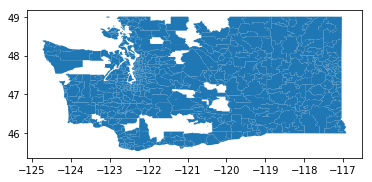

In [73]:
%matplotlib inline
worldMap.plot()

In [ ]:
import shapefile

myshp = open("https://github.com/EvansDataScience/data/raw/master/WAzips/SAEP_ZIP_Code_Tabulation_Areas.shp", "rb")
mydbf = open("https://github.com/EvansDataScience/data/raw/master/WAzips/SAEP_ZIP_Code_Tabulation_Areas.dbf", "rb")
myshx = open("https://github.com/EvansDataScience/data/raw/master/WAzips/SAEP_ZIP_Code_Tabulation_Areas.shx", "rb")
myprj = open("https://github.com/EvansDataScience/data/raw/master/WAzips/SAEP_ZIP_Code_Tabulation_Areas.prj", "rb")
r = shapefile.Reader(shp=myshp, dbf=mydbf,prj=myprj,shx=myshx)

In [ ]:
import requests
import zipfile
import io

In [ ]:
url = 'https://github.com/EvansDataScience/data/raw/master/WAzips.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")
filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

In [ ]:
z.namelist()

In [ ]:
url = 'https://github.com/EvansDataScience/data/raw/master/WAzips.zip'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))

with zipfile.ZipFile(r.content) as myzip:
    with myzip.open('SAEP_ZIP_Code_Tabulation_Areas.shp') as myfile:
        print(myfile.read())

In [ ]:
mydbf, myprj, myshp, myshx = [filename for filename in filenames]
usa = shapefile.Reader(shp=myshp, dbf=mydbf,prj=myprj,shx=myshx)
print("Shape of the dataframe: {}".format(usa.shape))
print("Projection of dataframe: {}".format(usa.crs))
usa.tail() #last 5 records in dataframe

____

* [Ir a inicio](#beginning)
* [Menú Principal](https://reproducibilidad.github.io/tallerPeru/)

_____

**AUSPICIO**: 

El desarrollo de estos contenidos ha sido posible gracias al grant del Berkeley Initiative for Transparency in the Social Sciences (BITSS) at the Center for Effective Global Action (CEGA) at the University of California, Berkeley


<center>
<img src="https://github.com/MAGALLANESJoseManuel/BITSS_ToolsWorkshop/raw/master/LogoBitss.jpg" style="width: 300px;"/>
</center>

**RECONOCIMIENTO**

<!--
EL Dr. Magallanes agradece a la Pontificia Universidad Católica del Perú, por su apoyo en la elaboración de este trabajo.

<center>
<img src="https://github.com/MAGALLANESJoseManuel/BITSS_ToolsWorkshop/raw/master/LogoPUCP.jpg" style="width: 200px;"/>
</center>
-->

El autor reconoce el apoyo que el eScience Institute de la Universidad de Washington le ha brindado desde el 2015 para desarrollar su investigación en Ciencia de Datos.

<center>
<img src="https://github.com/MAGALLANESJoseManuel/BITSS_ToolsWorkshop/raw/master/LogoES.png" style="width: 300px;"/>
</center>

<br>
<br>